In [79]:
import numpy as np
from matplotlib import pyplot as plt
from multifractal_analysis.double_trace_moment import get_eta_vs_kqeta_points
from multifractal_analysis.cascade_simulations import discreat_um_sym
from sklearn.linear_model import LinearRegression
from multifractal_analysis.regression_solution import RegressionSolution

# Read the Data Used in the Tutorial

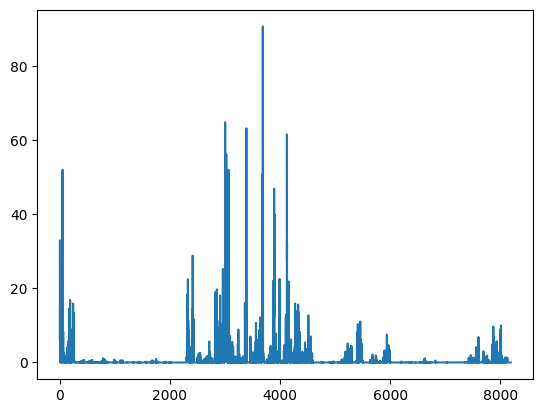

In [98]:
n = 13
alpha = 1.1
c1 = 0.28
data = discreat_um_sym(n, alpha, c1)
plt.plot(data)

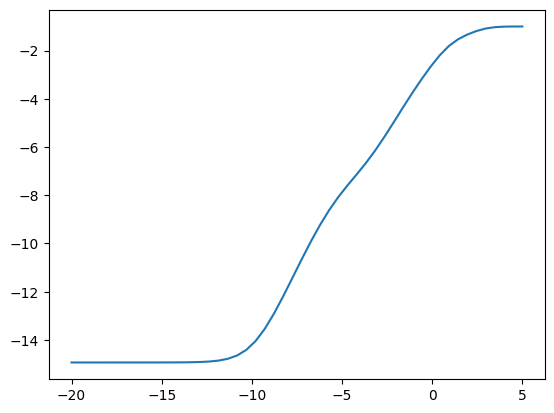

In [99]:
q = 1.5
lims = (-20.0, 5.0)
x, y = get_eta_vs_kqeta_points(data,q, lims=lims)
plt.plot(x,y)

1.1225441873427435


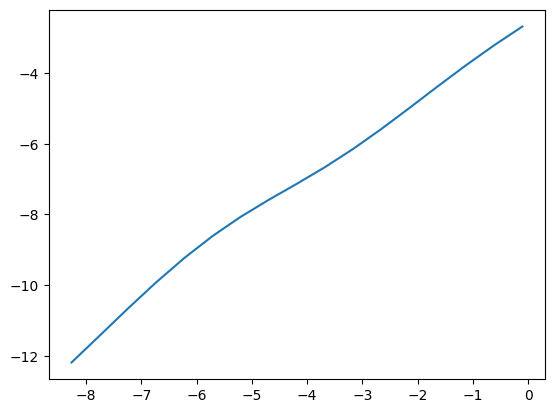

In [103]:
left, right = np.quantile(y, 0.45), np.quantile(y, 0.80)
area = np.where([left < v < right for v in y])
sol = RegressionSolution(x[area], y[area])
print(sol.angular_coef)
plt.plot(x[area], y[area])


In [35]:
from itertools import pairwise
def convolve(window:int, y:np.ndarray):
    return np.array([np.mean(y[i:i+window]) for i in range(y.shape[0])])

def derivada(x:np.ndarray,y:np.ndarray):
    dx = x[1] - x[0]
    return (x[:-1], np.array([(yf-y0)/dx for  y0, yf in pairwise(y)]))

def split_uncontinuous(x:np.ndarray):
    x = x.flatten()
    continuous = []
    curr_section = [x[0]]
    flag = True
    for el0, elf in pairwise(x):
        d = abs(elf - el0)
        if d > 5.0:
            continuous.append(np.array(curr_section))
            curr_section = [elf]
        else:
            curr_section.append(elf)
    
    continuous.append(np.array(curr_section))
    return [(item[0], item[-1]) for item in continuous if len(item) >= 5]

def plot_multiple(ax: plt.Axes, lines):
    ym = np.mean(ax.get_ybound())
    for cont in lines:
        xmin, xmax = cont[0], cont[-1]
        ax.hlines(ym, xmin, xmax, 'r')

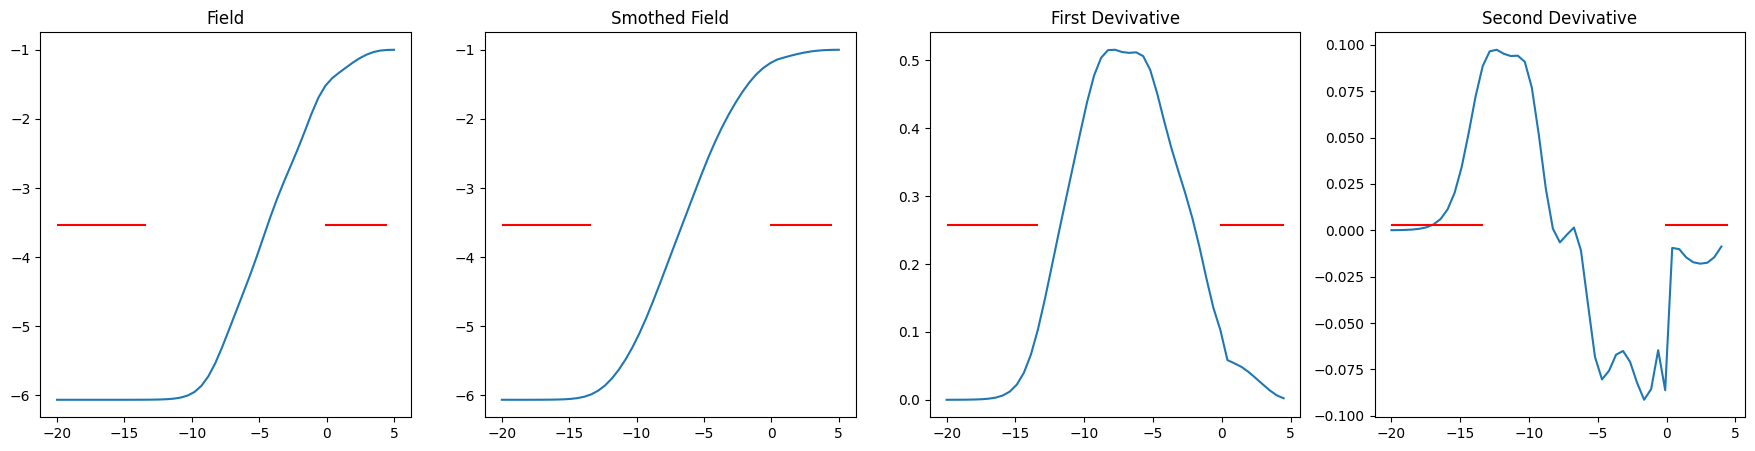

In [37]:
ncols = 4
nrows = 1
figure = plt.figure()
figure.set_size_inches((ncols*5 + 2, nrows*5))
idx = 1
# Smoth de function and calculate de derivatives
sx, sy = x, convolve(10, y)
x_, y_ = derivada(sx,sy)
x__, y__ = derivada(x_,y_)
e = np.quantile(abs(y_), 0.5)
areas = split_uncontinuous(np.argwhere( np.abs(y_)< e))
areax = x[areas]

ax = figure.add_subplot(nrows, ncols, idx)
ax.set_title("Field")
ax.plot(x, y)
plot_multiple(ax, areax)
idx += 1

ax = figure.add_subplot(nrows, ncols, idx)
ax.set_title("Smothed Field")
ax.plot(sx, sy)
plot_multiple(ax, areax)
idx += 1

ax = figure.add_subplot(nrows, ncols, idx)
ax.set_title("First Devivative")
ax.plot(x_, y_)
plot_multiple(ax, areax)
idx += 1

ax = figure.add_subplot(nrows, ncols, idx)
ax.set_title("Second Devivative")
ax.plot(x__, y__)
plot_multiple(ax, areax)
idx += 1


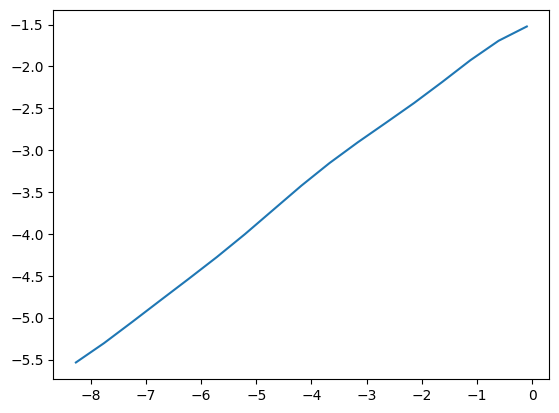

In [77]:
left, right = np.quantile(y, 0.45), np.quantile(y, 0.80)
area = np.where([left < v < right for v in y])
sol = RegressionSolution(x[area], y[area])
sol.angular_coef
plt.plot(x[area], y[area])

0.5049558272976926